### SENTIMENT ANALYSIS USING NLP APPROACH TO DETECT SARCASM

**Import all the required libraries.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np
import matplotlib.pyplot as plt

**Let's load the data**
<br> You can download this dataset from this [kaggle link](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) or the way I've done it here.
<br>This dataset is in json file so we need to get the data out of it first before we proceed to sentiment analysis

In [4]:
"""#creating empty lists to store the data items from the dataset
sentences = []
labels = [] 
urls = []

link = "https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json"
#This function will yeild data from  the json file by reading through it
def parse_data(link):
    for l in open(link,'r'):
        yield json.loads(l)"""

#this line will parse the yeilded json data so that we can further use it to process
data = parse_data('Sarcasm_Headlines_Dataset.json')

#looping through the data parsed above and appending into the python arrays created
for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [5]:

#defining the parameters for our model to build, in future if needed to change we can do it from here
vocab_size = 10000
embedding_dimension = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'             
oov_tok = '<OOV>'                  
training_size = 20000

#Training & Testing sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

#Training & Testing labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


# Pre-process the data for training a neural network



In this we step of pre-processing we do these steps:-
- **Tokenize** the text. [**Tokenizer class** allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count]<br>
- Then use **fit_on_texts** function to fit the vocabulary size of the training sentences
- Then create **sequences** of the tokens created in the previous step and outputs a python array of numberes with sequences of the tokens that represent the sentence numnerically in our defined way.
- Then **pad** the sequences with zeros incase any sequence is short, as it may happen because all sentences are not of the same size.


In [6]:
 # OOV tokens are the out-of-vocabulary words which could be encountered during tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)  

#this will fit the text with num_words on input sentences
tokenizer.fit_on_texts(training_sentences)

#this will create a word index dictionary of indexing of tokens.
word_index = tokenizer.word_index

#this creates sequences of tokens and outputs a python array with sequences of tokens repersenting the sentence
training_sequences = tokenizer.texts_to_sequences(training_sentences)

#this will padd the sequences with zero who has a short sequences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  


#this creates sequences of tokens and outputs a python array with sequences of tokens repersenting the sentence
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#this will padd the sequences with zero who has a short sequences
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Next step of pre-processing is the final step in this we just convert the test & train sequences to numpy array in order to feede them to our neural network.

In [7]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Build the model

Building a neural network is the most interesting thing and also boring at the same time. 
In this we will use the layers as follows:
- **Embedding layer:** Turns positive integers (indexes) into dense vectors of fixed size.
e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]].
This layer can only be used as the first layer in a model.
- **GlobalAveragePooling1D**
- **Dense layer:** Just your regular densely-connected NN layer.Ie've used 24 units here, you can play around by trying to add more dense layers
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
- **Dense layer** - This is a final layer with only one unit as it is the ouput layer of the entire neural network and here we've used sigmoid activation function as sigmiod function gives better realistic values than relu  between 0 to 1.

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dimension,
                                                       input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


# Train the model

Training your model will finally make the neural network work in action and after training we can then use it to predict new unseen values.<br>
**This is how the basic neural network computation works**
- Take input
- Forwarad propogate
- Predict values
- Calculate loss/error
- Back Propogate

<img src = "https://miro.medium.com/proxy/1*mTTmfdMcFlPtyu8__vRHOQ.gif" height=400 width =600>

In [10]:
history = model.fit(training_padded, training_labels, epochs = 30,validation_data=(testing_padded,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 2s - loss: 0.6615 - acc: 0.5956 - val_loss: 0.5761 - val_acc: 0.8104
Epoch 2/30
20000/20000 - 1s - loss: 0.4372 - acc: 0.8324 - val_loss: 0.3944 - val_acc: 0.8323
Epoch 3/30
20000/20000 - 1s - loss: 0.3171 - acc: 0.8747 - val_loss: 0.3574 - val_acc: 0.8462
Epoch 4/30
20000/20000 - 1s - loss: 0.2655 - acc: 0.8950 - val_loss: 0.3538 - val_acc: 0.8465
Epoch 5/30
20000/20000 - 1s - loss: 0.2306 - acc: 0.9104 - val_loss: 0.3401 - val_acc: 0.8584
Epoch 6/30
20000/20000 - 1s - loss: 0.2027 - acc: 0.9241 - val_loss: 0.3452 - val_acc: 0.8553
Epoch 7/30
20000/20000 - 1s - loss: 0.1816 - acc: 0.9326 - val_loss: 0.3533 - val_acc: 0.8550
Epoch 8/30
20000/20000 - 1s - loss: 0.1635 - acc: 0.9389 - val_loss: 0.3699 - val_acc: 0.8529
Epoch 9/30
20000/20000 - 1s - loss: 0.1465 - acc: 0.9462 - val_loss: 0.3943 - val_acc: 0.8430
Epoch 10/30
20000/20000 - 1s - loss: 0.1352 - acc: 0.9511 - val_loss: 0.4004 - val_acc: 0.8496
Epoch 11/3

# Evaluate the model
Evaluating the model is the important step as it allows us to better the model and tune some hyperparameters and pump up the accuracy. There also some things to keep in mind while tuning your projects like for example **not overfitting** the dataset to pump up the accuracy on testing set, **not underfitting** the dataset too is an important and there are some other metrics to keep in my mind.

Here since the model is pretty easy we've got 0.9984 accuracy on the training data and around 80% accuracy on the test data which is the reakky good and almost as perfect and it means that our model can predict correctly 99%. 

Below are the graphs:
<br>
- First graphs shows the training set accuracy and  what is the validation sete accuracy.<br>
- Second graph shows the loss function's values and what was the validation loss.






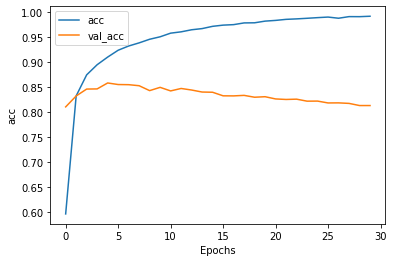

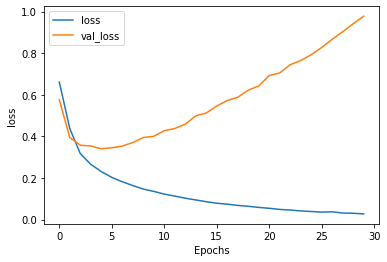

In [21]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,'acc')
plot_graphs(history,'loss')

In [22]:
sentences_to_predict = [ "If stupidity was a profession then you’d be a billionaire.",
                        "Don’t talk while I am interrupting!",
                        "Today is bright and sunny day"
       
]

seq = tokenizer.texts_to_sequences(sentences_to_predict)

pad = pad_sequences(seq,maxlen=max_length,padding=padding_type,
                    truncating = trunc_type)
print(model.predict(pad))


[[3.0033101e-05]
 [2.9106142e-03]
 [3.1653556e-04]]


As you can see here the three sentences differing from not a sarcastic one to sarcastic to most sarcastic the output gets higher and closer to 1 which is sarcastic sentence and the sentences that are just plain text are with values almost equal to 0 or near to 0.<br><br>
We can from here save the model and create a system(GUI) if we want to make an interactive project.
That's all, Thank you for staying and making it this far.<br>